In [1]:
"This demo shows how to do K-Means Clustering"
"on the CIFAR-10 dataset."

%matplotlib inline

# Numpy is a python library for scientific computing
import numpy as np
# library allowing us to handle serialization in python
import cPickle as pickle
# library that allows us to write shell commands in python
import os
# library to generate plots
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# # First, download the CIFAR-10 data
# os.system('wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz')
# os.system('tar -xzvf cifar-10-python.tar.gz')


""" load all of cifar """
xs = []
ys = []
for b in range(1,6):
    filename = os.path.join('cifar-10-batches-py/data_batch_%d' % (b, ))
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
    xs.append(X)
    ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
with open('cifar-10-batches-py/test_batch', 'rb') as f:
    datadict = pickle.load(f)
    X = datadict['data']
    Y = datadict['labels']
    Xte = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Yte = np.array(Y)
    
print 'Training data shape: ', Xtr.shape
print 'Training labels shape: ', Ytr.shape
print 'Test data shape: ', Xte.shape
print 'Test labels shape: ', Yte.shape

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
# So, what do we get in this dictionary?
key_num = 1
for key in data_dict:
    print('Key No. '+ str(key_num) + ' is ' + str(key))
    key_num += 1

Key No. 1 is data
Key No. 2 is labels
Key No. 3 is batch_label
Key No. 4 is filenames


In [109]:
# Store the data in more meaningful labels

data = data_dict['data']
labels = data_dict['labels']
batch_labels = data_dict['batch_label']
filenames = data_dict['filenames']

# Figure out what we are dealing with
print('The type of data is: ' + str(type(data)))
print("The type of labels is: " + str(type(labels))) # this is a list, not an array
print("The type of batch_labels is: " + str(type(batch_labels))) # what is this string doing here?
print("The type of filenames is: " + str(type(filenames))) # this is a list, not an array

The type of data is: <type 'numpy.ndarray'>
The type of labels is: <type 'list'>
The type of batch_labels is: <type 'str'>
The type of filenames is: <type 'list'>


The length of the data is: 3072
The label is: 6
The name of the file is: leptodactylus_pentadactylus_s_000004.png


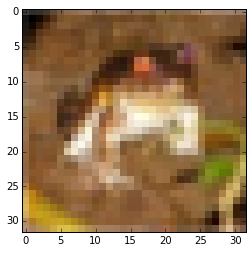

The length of the data is: 3072
The label is: 9
The name of the file is: camion_s_000148.png


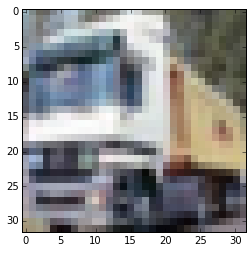

In [122]:
#print the first example to have a look
print('The length of the data is: ' + str(len(data[0])))
print('The label is: ' + str(labels[0]))
print('The name of the file is: ' + str(filenames[0]))

image_idx0 = data[0].reshape(3,32,32).transpose(1,2,0)
plt.imshow(image_idx0)
plt.show()

#what about the second one?
print('The length of the data is: ' + str(len(data[1])))
print('The label is: ' + str(labels[1]))
print('The name of the file is: ' + str(filenames[1]))
image_idx0 = data[1].reshape(3,32,32).transpose(1,2,0)
plt.imshow(image_idx0)
plt.show()

In [22]:
# Now we train our KNN model with only a single nearest neighbor

# Subsample the data for more efficient code execution in this exercise
num_training = 1000
mask = range(num_training)
X_train = Xtr[mask]
y_train = Ytr[mask]

num_test = 100
mask = range(num_test)
X_test = Xte[mask]
y_test = Yte[mask]

# Reshape the image data into rows
train_data = np.reshape(X_train, (X_train.shape[0], -1))
test_data = np.reshape(X_test, (X_test.shape[0], -1))
print train_data.shape, test_data.shape

dists = np.zeros((num_test, num_training))

for i in xrange(num_test):
  for j in xrange(num_training):
    
    #####################################################################
    # TODO:                                                             #
    # Implement the L2 distance that we discusses in class by           #
    # substituting the currently used L1 distance                       #
    #####################################################################

    dists[i,j] = np.sum(np.abs(train_data[j,:] - test_data[i,:]))


  #######################################################################
  #                         END OF YOUR CODE                            #
  #######################################################################
    
y_pred = np.zeros(num_test)
for i in xrange(num_test):

  # sort the elements in the ith row in dists
  dists_i_row_sorted=np.argsort(dists[i,:]) 
  # find the labels for the top k closes training points
  closest_label = y_train[dists_i_row_sorted[:1]]   

  y_pred[i]=closest_label

(1000, 3072) (100, 3072)


In [23]:
print(y_pred.astype(int).shape)
print(y_test.shape)

print((sum(y_pred.astype(int) == y_test))*100 / num_test)



(100,)
(100,)
30
